In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h=1/24 # Days
N0=2 # Persone
t0=0 # Days
M=30*24 #

ag=0.16 #1/Days
al=0.57 #1/Days

Nl_inf=1618 # Persone
Ng_inf=4724 # Persone

In [8]:
F_G=lambda N,t: N*ag*np.log(Ng_inf/N)
F_L=lambda N,t: N*al*(1-N/Nl_inf)

N_G_exact=lambda t: Ng_inf*np.exp(np.log(N0/Ng_inf)*np.exp(-ag*(t-t0)))
N_L_exact=lambda t: N0*np.exp(al*(t-t0))/(1-N0/Nl_inf*(1-np.exp(al*(t-t0))))

In [9]:
N_L=np.empty((M,))
N_G=np.empty_like(N_L)
t=t0+h*np.arange(M) # Days

N_L[0]=N_G[0]=N0

for i in range(M-1):
    # N[i+1]=N(t+h)
    
    k1=F_G(N_G[i],t[i])
    N_pred=N_G[i]+h*k1
    k2=F_G(N_pred,t[i+1])
    N_G[i+1]=N_G[i]+h*0.5*(k1+k2)
    
    k1=F_L(N_L[i],t[i])
    N_pred=N_L[i]+h*k1
    k2=F_L(N_pred,t[i+1])
    N_L[i+1]=N_L[i]+h*0.5*(k1+k2)

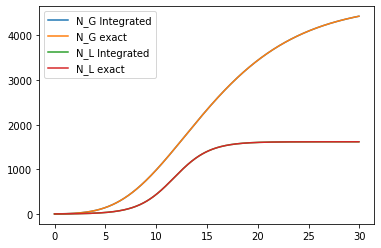

In [11]:
plt.plot(t,N_G,label='N_G Integrated')
plt.plot(t,N_G_exact(t),label='N_G exact')

plt.plot(t,N_L,label='N_L Integrated')
plt.plot(t,N_L_exact(t),label='N_L exact')

plt.legend()


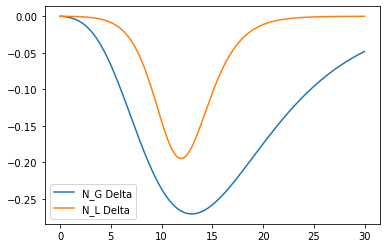

In [12]:
plt.plot(t,N_G-N_G_exact(t),label='N_G Delta')

plt.plot(t,N_L-N_L_exact(t),label='N_L Delta')

plt.legend()